In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ftone = 0.09
fnyquist = 0.5

In [3]:
fharm = np.arange(1, np.floor(fnyquist/ftone)+1)*ftone

In [4]:
fharm

array([0.09, 0.18, 0.27, 0.36, 0.45])

In [5]:
coeffs = np.array([1.0])
for f in fharm:
    coeffs = np.convolve(
        coeffs,
        [-1.0, -1.0] if f == fnyquist else [1.0, -2*np.cos(2*np.pi*f), 1.0])

In [6]:
coeffs

array([1.        , 0.88741305, 0.95234314, 0.90368884, 0.94512082,
       0.90662245, 0.94512082, 0.90368884, 0.95234314, 0.88741305,
       1.        ])

In [7]:
coeffs /= coeffs.sum()

In [8]:
coeffs

array([0.09724075, 0.08629271, 0.09260656, 0.08787538, 0.09190426,
       0.08816065, 0.09190426, 0.08787538, 0.09260656, 0.08629271,
       0.09724075])

In [9]:
dly1st = np.floor(1.0/ftone - 0.5*len(coeffs))+1

In [10]:
dly1st

6.0

In [11]:
ftest = np.arange(0, 0.5, 0.1*ftone)

In [12]:
transf = (np.exp(-2j*np.pi*np.arange(dly1st, dly1st+len(coeffs))[None, :]
                *ftest[:, None])
         *coeffs[None,:]).sum(axis=1)

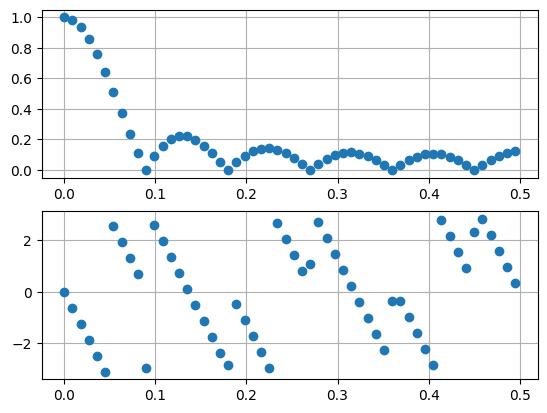

In [13]:
fig, ax = plt.subplots(2)
ax[0].plot(ftest, np.abs(transf), "o")
ax[1].plot(ftest, np.angle(transf), "o")
ax[0].grid()
ax[1].grid()